<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Step 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Step 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Step 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Step 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Step 5: Model Evaluation and Refinement</a></li>
</a></li>


<hr>


# ✨ Project Summary 


This project is a hands-on implementation of supervised machine learning and data analysis using Python, developed as the final assignment of the IBM Data Analyst Professional Certificate.

The objective is to predict housing prices in King County (USA) using real-world sales data and various property features. Throughout the project, I demonstrate practical skills in:
	•	Data cleaning and wrangling with pandas
	•	Data visualization and insights using matplotlib and seaborn
	•	Feature engineering including polynomial feature expansion
	•	Model development and evaluation using scikit-learn’s LinearRegression, Ridge, and pipelines
	•	Building end-to-end machine learning workflows that are readable, modular, and production-ready

This project is designed to showcase my ability to work with real datasets, develop predictive models, and evaluate their performance — all using Python. It reflects my readiness to apply these skills in real-world data science and machine learning roles.


# About the Dataset


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
#!pip install -U scikit-learn

In [4]:
import piplite
await piplite.install('seaborn')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# Step 1: Importing Data Sets


To begin the analysis, I downloaded the dataset by executing the cell below.

In [9]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [10]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [11]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Load the csv:


In [12]:
df = pd.read_csv(file_name)

In [ ]:
#filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
#df = pd.read_csv(filepath, header=None)

I use the method <code>head</code> to display the first 5 columns of the dataframe.


In [13]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


“I used the .dtypes attribute to display the data types of each column in the dataset. Below is the code and output.”


In [14]:
df.dtypes.sort_values()

Unnamed: 0         int64
zipcode            int64
yr_renovated       int64
yr_built           int64
sqft_basement      int64
sqft_above         int64
grade              int64
condition          int64
sqft_living15      int64
view               int64
sqft_lot           int64
sqft_living        int64
id                 int64
waterfront         int64
sqft_lot15         int64
floors           float64
bathrooms        float64
bedrooms         float64
price            float64
lat              float64
long             float64
date              object
dtype: object

I use the method describe to obtain a statistical summary of the dataframe.


In [15]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Step 2: Data Wrangling


To begin cleaning the dataset, I removed the columns 'id' and 'Unnamed: 0' using the .drop() method with axis=1 and inplace=True. Then, I used the .describe() method to generate a statistical summary of the remaining data. 

In [16]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [17]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [18]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [19]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [20]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Step 3: Exploratory Data Analysis


I used the .value_counts() method to count how many houses had each unique number of floors. Then, I converted the result into a DataFrame using .to_frame() for better readability.

In [21]:

floor_counts = df["floors"].value_counts().to_frame()
floor_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


To explore the relationship between waterfront views and house prices, I used the boxplot function from the seaborn library. This allowed me to visually compare the distribution of prices for houses with and without a waterfront view, and to identify which group had more price outliers.

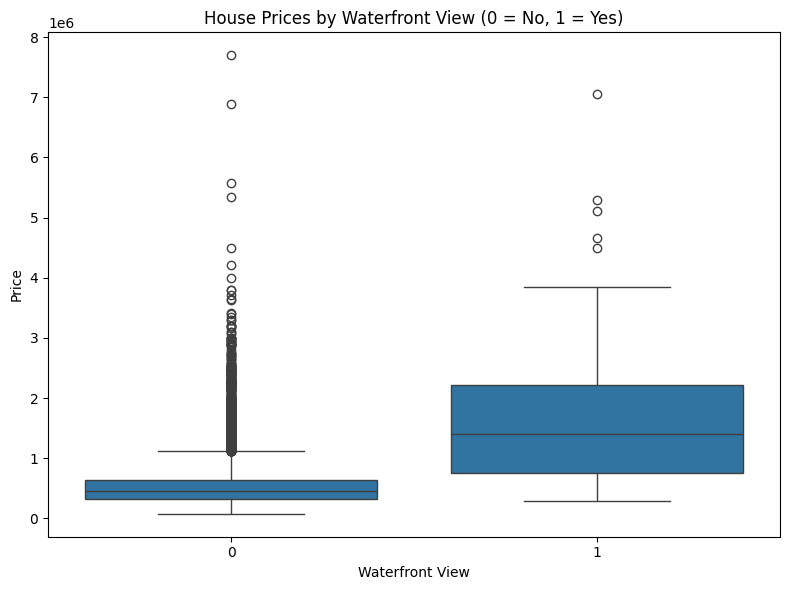

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("House Prices by Waterfront View (0 = No, 1 = Yes)")
plt.xlabel("Waterfront View")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

To examine the correlation between sqft_above and price, I used the regplot function from the seaborn library. This scatterplot with a regression line helped me determine whether the relationship was positive or negative.

<Axes: xlabel='sqft_above', ylabel='price'>

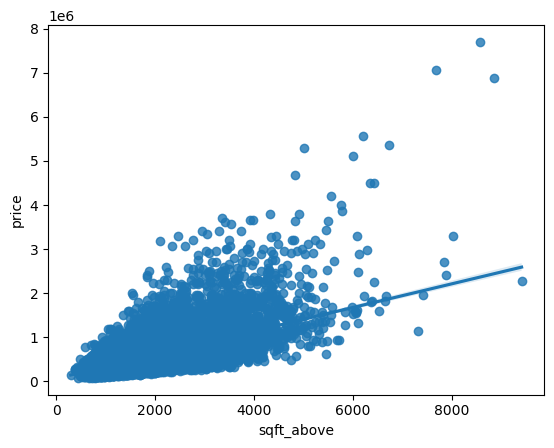

In [23]:
sns.regplot(x="sqft_above", y="price", data=df)

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [24]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Step 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [21]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

I built a simple linear regression model to predict house prices using sqft_living as the independent variable. After fitting the model, I calculated the R² score to evaluate its performance. 


In [22]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.4928532179037931

I developed a multiple linear regression model to predict price using a selected list of features including floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, and sqft_living. After fitting the model, I calculated the R² score to assess how well these features explain the variation in house prices.

In [23]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [32]:
X = df[features]
Y = df["price"]

lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.6576951666037498

To streamline the modeling process, I created a pipeline consisting of three steps: standardizing the features with StandardScaler(), generating polynomial features with PolynomialFeatures(degree=2), and fitting a linear regression model using LinearRegression(). I trained the pipeline using the same set of features from the previous step and calculated the R² score to evaluate its performance. 

### steps :

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [33]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [34]:
pipeline = Pipeline(Input)
pipeline.fit(X, Y)
pipeline.score(X, Y)

0.7513408515988734

# Step 5: Model Evaluation and Refinement


Import the necessary modules:


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


I will split the data into training and testing sets:


In [36]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


To improve model generalization and reduce overfitting, I implemented a Ridge regression model with a regularization parameter (alpha) set to 0.1. I trained the model using the training data and evaluated its performance on the test set by calculating the R² score. 


In [37]:
from sklearn.linear_model import Ridge

In [38]:
from sklearn.metrics import r2_score
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
y_pred = RidgeModel.predict(x_test)
r2_score(y_test, y_pred)

0.647875916393907

To capture potential nonlinear relationships among the features, I applied a second-order polynomial transformation to both the training and testing data. I then created and trained a Ridge regression model using the transformed training data, with a regularization parameter (alpha) set to 0.1. Finally, I evaluated the model’s performance by calculating the R² score on the transformed test set.

In [39]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
y_pred = RidgeModel.predict(x_test_pr)
r2_score(y_test, y_pred)

0.7002744270151646

## ✅ Final Summary

This project allowed me to apply the full data analysis pipeline — from data wrangling and exploratory analysis to model development and evaluation — using Python.  
I worked with real-world housing data and used both linear and regularized regression techniques, including polynomial feature transformation and pipeline design.

Through this hands-on experience, I strengthened my skills in `pandas`, `seaborn`, and `scikit-learn`, and demonstrated the ability to build interpretable, reproducible machine learning models.  
This project reflects my readiness to take on real-world data challenges and contribute effectively as a data analyst or machine learning practitioner.